In [ ]:
# import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [ ]:
# startup_funding

data = pd.read_csv("/content/startup_funding (1).csv")
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
# Changing columns name

data.rename(columns={'Date dd/mm/yyyy':'Date','City  Location':'City','InvestmentnType':'Investment Type','Amount in USD':'USD'},inplace=True)
data.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,Investment Type,USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
# all about Dataset

data.info()

# 'date' dtype is object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date               3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City               2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   Investment Type    3040 non-null   object
 8   USD                2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [ ]:
# null values

data.isnull().sum()

Sr No                   0
Date                    0
Startup Name            0
Industry Vertical     171
SubVertical           936
City                  180
Investors Name         24
Investment Type         4
USD                   960
Remarks              2625
dtype: int64

In [ ]:
# duplicates

data.duplicated().value_counts()

False    3044
dtype: int64

In [ ]:
# date type - object to datetime && change the column name

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3044 entries, 0 to 3043
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
3040 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 23.9 KB


<ipython-input-8-71bafa9a0ed2>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [ ]:
# USD type - object to float

data['USD'] = data['USD'].str.replace(',','')

data = data[(data['USD'] != 'undisclosed') & (data['USD'] != 'unknown') & (data['USD'] != 'Undisclosed') & (data['USD'] != "nan") & (data['USD'] != '14342000+')]

data['USD'] = pd.to_numeric(data['USD'], errors = 'coerce')

<ipython-input-9-c3adefc4e7c7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['USD'] = pd.to_numeric(data['USD'], errors = 'coerce')


In [ ]:
data['USD']

0       200000000.0
1         8048394.0
2        18358860.0
3         3000000.0
4         1800000.0
           ...     
3039      4500000.0
3040       825000.0
3041      1500000.0
3042            NaN
3043       140000.0
Name: USD, Length: 3036, dtype: float64

Data Cleaning

In [ ]:
# Droping the Remarks column

data = data.drop("Remarks",axis=1)

In [ ]:
data.head()

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,Investment Type,USD
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [ ]:
data.isnull().sum()

Sr No                  0
Date                   4
Startup Name           0
Industry Vertical    171
SubVertical          936
City                 180
Investors Name        24
Investment Type        4
USD                  971
dtype: int64

In [ ]:
# droping null values of Date column

data = data[~(data['Date'].isna())]
data.isnull().sum()

Sr No                  0
Date                   0
Startup Name           0
Industry Vertical    170
SubVertical          933
City                 179
Investors Name        24
Investment Type        4
USD                  970
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3032 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Sr No              3032 non-null   int64         
 1   Date               3032 non-null   datetime64[ns]
 2   Startup Name       3032 non-null   object        
 3   Industry Vertical  2862 non-null   object        
 4   SubVertical        2099 non-null   object        
 5   City               2853 non-null   object        
 6   Investors Name     3008 non-null   object        
 7   Investment Type    3028 non-null   object        
 8   USD                2062 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 236.9+ KB


In [ ]:
data.sample(5)

,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City,Investors Name,Investment Type,USD
840,841,2017-05-24,GenNext Students,Consumer Internet,Online Tutoring Services,Mumbai,Undisclosed Investors,Seed Funding,580000.0
2629,2630,2015-07-22,Iqlect,Big Data & Analytics platform,NaN,Bangalore,Exfinity Venture Partners,Private Equity,2000000.0
2260,2261,2015-11-21,Healers At Home,"Home Healthcare Services platform,",NaN,New Delhi,"Daljit Singh, Dr. Pramath Raj Sinha, BVR Mohan...",Seed Funding,NaN
1789,1790,2016-04-19,CollegeDekho,Consumer Internet,College & Student information platform,New Delhi,Man Capital,Private Equity,2000000.0
810,811,2017-10-05,Vidooly,Consumer Internet,Video Intelligence platform,Noida,"Times Internet, GVFL",Private Equity,1400000.0


Insights -<br>
Find out what type of startups are getting funded in the last few years?<br>
Who are the important investors?<br>
What are the hot fields that get a lot of funding these days?<br>

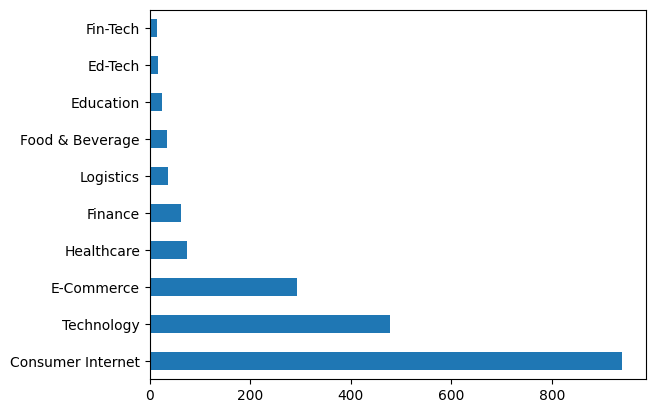

In [ ]:
# Find out what type of startups are getting funded in the last few years?

def cleanInd(field):
  if field == 'eCommerce':
    value = 'E-Commerce'
  elif field == 'ECommerce':
    value = 'E-Commerce'
  elif field == 'E-commerce':
    value = 'E-Commerce'
  elif field == 'Ecommerce':
    value = 'E-Commerce'
  elif field == 'Food and Beverage':
    value = 'Food & Beverage'
  elif field == 'Food and Beverages':
    value = 'Food & Beverage'
  elif field == 'FinTech':
    value = 'Fin-Tech'
  elif field == 'EdTech':
    value = 'Ed-Tech'
  elif field == 'Health and Wellness':
    value = 'Healthcare'
  elif field == 'Logistics Tech':
    value = 'Logistics'
  elif field == 'Food & Beverages':
    value = 'Food & Beverage'
  else:
    value = field
  return value

data['Industry Vertical'] = data['Industry Vertical'].apply(cleanInd)

data['Industry Vertical'].value_counts().nlargest(10).plot(kind='barh')
plt.show()

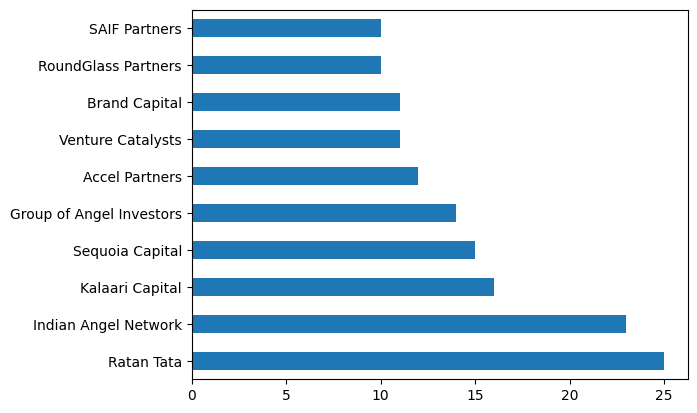

In [ ]:
# Who are the important investors?

data = data[(data['Investors Name'] != "Undisclosed Investors") & (data['Investors Name'] != "Undisclosed investors") & (data['Investors Name'] != "Undisclosed Investor") & (data['Investors Name'] != "Undisclosed") & (data['Investors Name'] != "undisclosed investors") & (data['Investors Name'] != "Undisclosed investor")]
data['Investors Name'].value_counts().nlargest(10).plot(kind='barh')
plt.show()

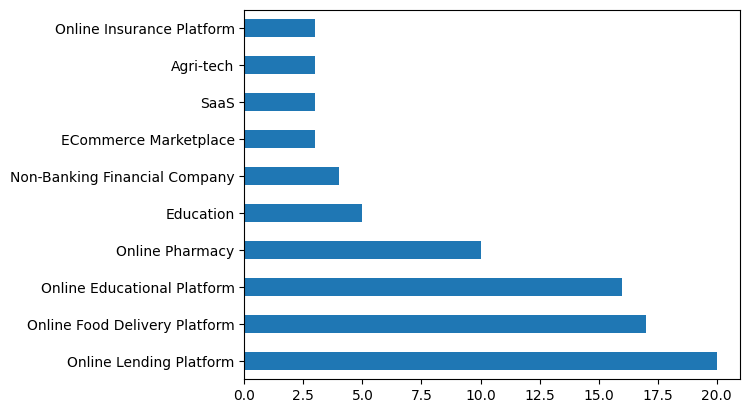

In [ ]:
# What are the hot fields that get a lot of funding these days?

def subVal(field):
  if field == 'Online Lending':
    value = 'Online Lending Platform'
  elif field == 'Online lending platform':
    value = 'Online Lending Platform'
  elif field == 'Online learning platform':
    value = 'Online Educational Platform'
  elif field == 'E-learning':
    value = 'Online Educational Platform'
  elif field == 'Online Education Platform':
    value = 'Online Educational Platform'
  elif field == 'Online Food Delivery':
    value = 'Online Food Delivery Platform'
  elif field == 'Food Ordering Mobile App':
    value = 'Online Food Delivery Platform'
  elif field == 'Food Delivery Platform':
    value = 'Online Food Delivery Platform'
  elif field == 'Online Learning Platform':
    value = 'Online Educational Platform'
  else:
    value = field
  return value

data['SubVertical'] = data['SubVertical'].apply(subVal)

data['SubVertical'].value_counts().nlargest(10).plot(kind='barh')
plt.show()

Problem Statement :<br>
Check the trend of investments over the years. To check the trend, find -<br>
Total number of fundings done in each year.<br>
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.<br>
Print year-wise total number of fundings also. Print years in ascending order.
Note :<br>
There is some error in the 'Date' feature. Make sure to handle that.<br>
Output Format :<br>
year1 TotalFunding1<br>
year2 TotalFunding2


In [ ]:
data['Year'] = data['Date'].dt.year

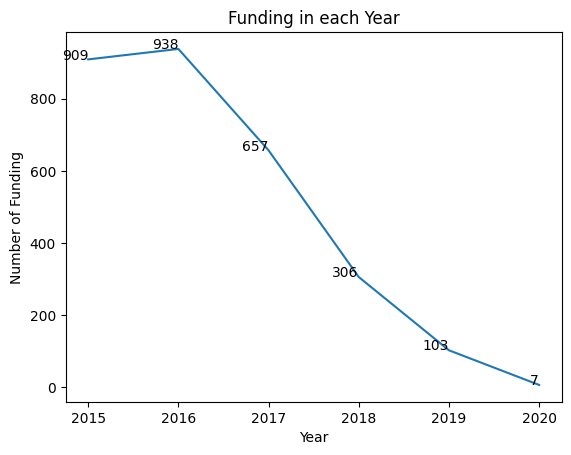

In [ ]:
dataYear = data['Year'].value_counts()
sns.lineplot(x = dataYear.index,y = dataYear.values)

xs = np.array(dataYear.index)
ys = np.array(dataYear.values)

for x,y in zip(xs,ys):
  label = str(y)
  plt.annotate(label,(x,y),ha='right')

plt.title('Funding in each Year')
plt.xlabel('Year')
plt.ylabel('Number of Funding')
plt.show()

Problem Statement :<br>
Find out which cities are generally chosen for starting a startup.<br>
Find top 10 Indian cities which have most number of startups ?
Plot a pie chart and visualise it.<br>
Print the city name and number of startups in that city also.<br>
Note :<br>
Take city name "Delhi" as "New Delhi".<br>
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".<br>
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the number of startups.


In [ ]:
data['City'] = data['City'].replace({"Bengaluru":"Bangalore","Bangalore/ Bangkok":"Bangalore","Bangalore / SFO":"Bangalore","Delhi":"New Delhi","New Delhi / US":"New Delhi"})

In [ ]:
data['City'].value_counts().idxmax()

'Bangalore'

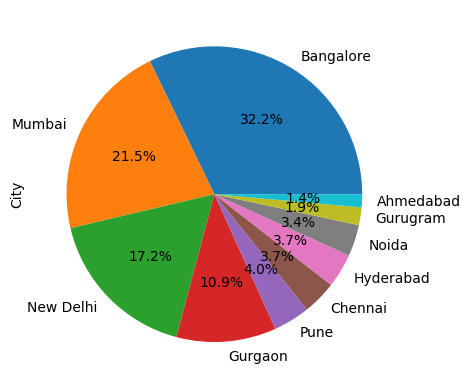

In [ ]:
data['City'].value_counts().nlargest(10).plot(kind='pie',autopct='%1.1f%%')
plt.show()

Problem Statement :<br>
Find out if cities play any role in receiving funding.<br>
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).<br>
Print the city and percentage with 2 decimal place after rounding off.<br>
Note:<br>
Take city name "Delhi" as "New Delhi".<br>
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".<br>
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.<br>
Print the city in descending order with respect to the percentage of funding.<br>



In [ ]:
TenCitySum = data.groupby('City')['USD'].sum().nlargest(10)
pd.DataFrame({"Percentage of total amount":round((data.groupby('City')['USD'].sum().nlargest(10)/TenCitySum.sum())*100,2)})

,Percentage of total amount
City,
Bangalore,54.69
Mumbai,13.71
New Delhi,9.90
Gurgaon,8.88
Noida,3.74
Gurugram,2.57
Chennai,2.13
Pune,1.87
Menlo Park,1.33


Problem Statement :<br>
There are 4 different type of investments. Find out percentage of amount funded for each investment type.<br>
Plot a pie chart to visualise.<br>
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.<br>
Note :<br>
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake.<br> You can find this by printing unique values from this column.<br>
Print the investment type in descending order with respect to the percentage of the amount funded.<br>


In [ ]:
data['Investment Type'] = data['Investment Type'].replace({'Private Equity Round':'Private Equity','Equity':'Private Equity','Equity Based Funding ':'Private Equity','Private\\nEquity':'Private Equity','Private':'Private Equity','PrivateEquity':'Private Equity','Private Funding':'Private Equity','Seed / Angle Funding':'Seed Funding','Seed/ Angel Funding':'Seed Funding','Seed Round':'Seed Funding','Seed':'Seed Funding','Angel / Seed Funding':'Seed Funding','Seed / Angel Funding':'Seed Funding','Seed Funding Round':'Seed Funding','Seed\\nFunding':'Seed Funding','Seed/Angel Funding':'Seed Funding','Seed\\nFunding':'Seed Funding','Debt and Preference capital':'Debt Funding','Term Loan':'Debt Funding','Debt-Funding':'Debt Funding','Structured Debt':'Debt Funding','Series A':'Crowd Funding','Series B':'Crowd Funding','Series C':'Crowd Funding','Series D':'Crowd Funding','Series B (Extension)':'Crowd Funding','Pre-series A':'Crowd Funding','Series F':'Crowd Funding','pre-Series A':'Crowd Funding','Series E':'Crowd Funding','Pre-Series A':'Crowd Funding','Series G':'Crowd Funding','Series H':'Crowd Funding','pre-series A':'Crowd Funding','Crowd funding':'Crowd Funding','':'Crowd Funding'})

In [ ]:
fourTypes = data[data['Investment Type'].isin(['Private Equity','Seed Funding','Debt Funding','Crowd Funding'])]

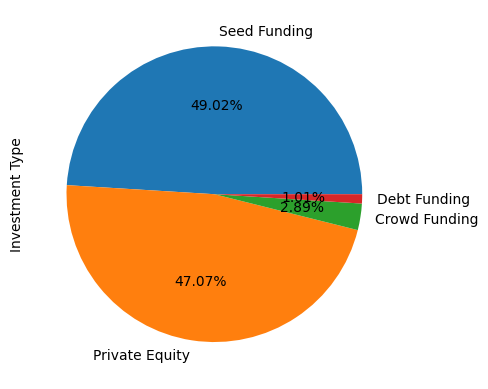

In [ ]:
fourTypes['Investment Type'].value_counts().plot(kind='pie',autopct='%2.2f%%')
plt.show()

Problem Statement :<br>
Which type of companies got more easily funding. To answer this question, find -<br>
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only) <br>
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.<br>
Note :<br>
Ecommerce is the right word in IndustryVertical, so correct it.<br>
Print the industry in descending order with respect to the percentage of the amount funded.<br>



In [ ]:
FiveCompSum = data.groupby('Industry Vertical')['USD'].sum().nlargest(5)
pd.DataFrame({"Percentage of total amount":round((data.groupby('Industry Vertical')['USD'].sum().nlargest(5)/FiveCompSum.sum())*100,2)})

,Percentage of total amount
Industry Vertical,
E-Commerce,36.95
Consumer Internet,27.94
Transportation,17.57
Technology,9.91
Finance,7.63


Problem Statement :<br>
Find top 5 startups with most amount of total funding.<br>
Print the startup name in descending order with respect to amount of funding.<br>
Note:<br>
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.


In [ ]:
data['Startup Name'] = data['Startup Name'].replace({'Ola Cabs':'Ola'})

In [ ]:
pd.DataFrame({"Total Funding Amount":data.groupby('Startup Name')['USD'].sum().nlargest()})

,Total Funding Amount
Startup Name,
Flipkart,4.059700e+09
Rapido Bike Taxi,3.900000e+09
Paytm,3.148950e+09
Ola,1.654200e+09
Udaan,8.700000e+08


Problem Statement :<br>
Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.<br>
Print the startup name in descending order with respect to the number of funding round as integer value.<br>
Note:<br>
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.


In [ ]:
pd.DataFrame({"Number of funding":data['Startup Name'].value_counts().head()})

,Number of funding
Ola,12
Swiggy,8
Paytm,7
NoBroker,6
UrbanClap,6
